## پروژه تشخیص احتمال حمله قلبی بر اساس ویژگی های ارائه شده  

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [119]:
df = pd.read_csv('16325569497737558.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
df.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [121]:
x = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']].values


y = df['output'].values

In [122]:
# normalize data
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x.astype(float))
#print(x[:6])

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


# Training

## Train by KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
knn

KNeighborsClassifier()

In [126]:
yhat = knn.predict(x_test)
print(yhat[:5])
print(y[:5])

[0 0 1 1 0]
[1 1 1 1 1]


# Accuracy evaluation for KNN
### پیدا کردن درصد خطا 

In [127]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, knn.predict(x_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.871900826446281
Test set Accuracy:  0.8032786885245902


# calculate the accuracy of the classifier for each K
## محاسه تمامی حالات k برای تعیین بهترین k


In [128]:
#calculate the accuracy of classifier for each k value
k = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))

for n in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77, 0.77, 0.8 , 0.8 , 0.8 , 0.82, 0.84, 0.82, 0.82])

# plot the accuracy for each k value

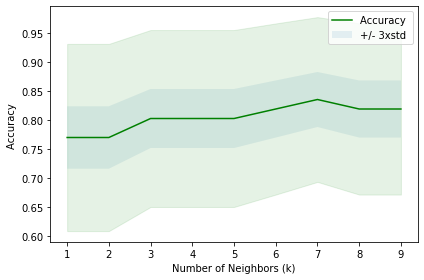

In [129]:
plt.plot(range(1,k), mean_acc, 'g')
plt.fill_between(range(1,k), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,k), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

# Train by Seting up the Decision Tree

## یادگیری بر اساس الگوریتم های درختی

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Modeling

In [131]:
drugTree = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)


# Training the Decision Tree Model

In [132]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Predicting the Test set results

In [133]:
predTree = drugTree.predict(x_test)

print(predTree[:5])
print(y_test[:5])

[0 0 1 1 1]
[1 0 1 1 0]


# Evalution of the model

In [134]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8524590163934426


In [135]:
from io import StringIO
import pydotplus
from sklearn import tree
import matplotlib.image as mpimg


In [136]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:13]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: can only concatenate str (not "numpy.int64") to str

# Train by Logistic Regression Model 

In [ ]:
import scipy.optimize as opt

# Training Model

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.1, solver='sag').fit(x_train, y_train)
LR

LogisticRegression(C=0.1, solver='sag')

In [209]:
yhat = LR.predict(x_test)
print(yhat[:5])
print(y_test[:5])

[1 0 1 1 1]
[1 0 1 1 0]


# Evaluation of Logestic Regression

In [210]:
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, yhat, pos_label=0))
print(jaccard_score(y_test, yhat, pos_label=1))

0.7777777777777778
0.85


# محاسبه تمامی ژاکارد اسکور ها با تمامی سالور ها

## for liblinear  

#### 0.75
#### 0.825

## for Sag

#### 0.77
#### 0.85

## for lbfgs

#### 0.769
#### 0.85


## for newton-cg

#### 0.7692307692307693
#### 0.8536585365853658


# confusion matrix

In [211]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 4 21]]


Confusion matrix, without normalization
[[34  2]
 [ 4 21]]


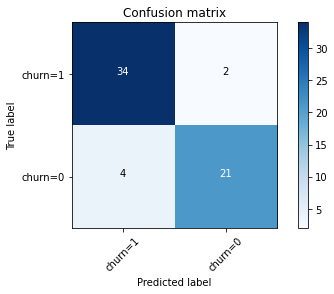

In [212]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [213]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



# Log Loss

In [214]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.29, 0.71],
       [0.9 , 0.1 ],
       [0.4 , 0.6 ],
       [0.04, 0.96],
       [0.26, 0.74],
       [0.56, 0.44],
       [0.75, 0.25],
       [0.09, 0.91],
       [0.39, 0.61],
       [0.24, 0.76],
       [0.33, 0.67],
       [0.06, 0.94],
       [0.27, 0.73],
       [0.67, 0.33],
       [0.19, 0.81],
       [0.98, 0.02],
       [0.15, 0.85],
       [0.15, 0.85],
       [0.85, 0.15],
       [0.44, 0.56],
       [0.1 , 0.9 ],
       [0.32, 0.68],
       [0.96, 0.04],
       [0.42, 0.58],
       [0.38, 0.62],
       [0.91, 0.09],
       [0.59, 0.41],
       [0.05, 0.95],
       [0.46, 0.54],
       [0.96, 0.04],
       [0.71, 0.29],
       [0.5 , 0.5 ],
       [0.03, 0.97],
       [0.24, 0.76],
       [0.37, 0.63],
       [0.07, 0.93],
       [0.11, 0.89],
       [0.29, 0.71],
       [0.49, 0.51],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.85, 0.15],
       [0.88, 0.12],
       [0.27, 0.73],
       [0.11, 0.89],
       [0.26, 0.74],
       [0.91, 0.09],
       [0.61,

In [215]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.3169578417054632

# Modeling with SVM - Support Vector Machines

In [270]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid', C=1)
clf.fit(x_train, y_train)

SVC(C=1, kernel='sigmoid')

In [271]:
yhat = clf.predict(x_test)
print(yhat[:5])
print(y_test[:5])

[1 0 1 1 1]
[1 0 1 1 0]


# Evaluation of SVM

In [272]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 4 21]]


Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


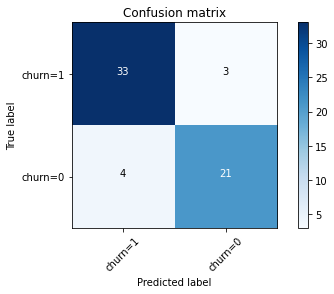

In [273]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [274]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

